# Calorie Predictor
Data: https://www.kaggle.com/competitions/playground-series-s5e5/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [2]:
df = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df2['Sex'] = df2['Sex'].map({'female': 0, 'male': 1})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  int64  
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 51.5 MB
None


## Feature Engineering

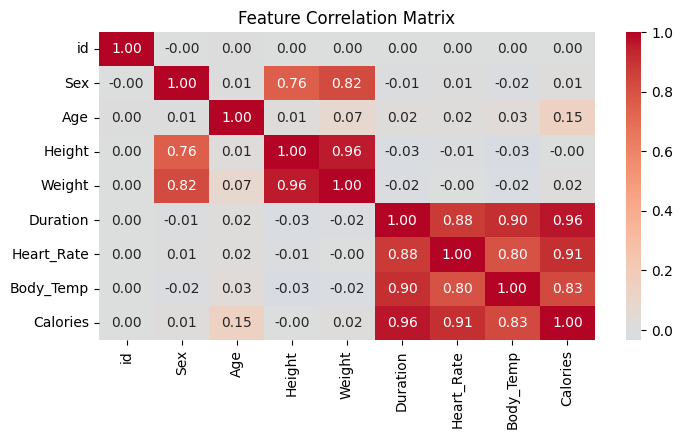

In [3]:
# Plot heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [4]:
df['bmi'] = df['Weight'] / (df['Height']/100)**2
df2['bmi'] = df2['Weight'] / (df2['Height']/100)**2

df['bmr'] = df['Weight'] * 10 + df['Height'] * 6.25 - df['Age'] * 5 + 5
df.loc[df['Sex'] == 0, 'bmr'] = df['Weight'] * 10 + df['Height'] * 6.25 - df['Age'] * 5 - 161
df2['bmr'] = df2['Weight'] * 10 + df2['Height'] * 6.25 - df2['Age'] * 5 + 5
df2.loc[df2['Sex'] == 0, 'bmr'] = df2['Weight'] * 10 + df2['Height'] * 6.25 - df2['Age'] * 5 - 161

df['log_bmr'] = np.log1p(df['bmr'])
df2['log_bmr'] = np.log1p(df2['bmr'])

df['log_bmi'] = np.log1p(df['bmi'])
df2['log_bmi'] = np.log1p(df2['bmi'])

df['bmr_sq'] = df['bmr'] * df['bmr']
df2['bmr_sq'] = df2['bmr'] * df2['bmr']

df['bmi_sq'] = df['bmi'] * df['bmi']
df2['bmi_sq'] = df2['bmi'] * df2['bmi']

pca = PCA(n_components=2)
pca_df = df[['Duration', 'Heart_Rate', 'Body_Temp']]
pca_df2 = df2[['Duration', 'Heart_Rate', 'Body_Temp']]
pca.fit(pca_df)
principal_components = pca.transform(pca_df)
principal_components2 = pca.transform(pca_df2)
df['pc1'] = principal_components[:, 0]
df['pc2'] = principal_components[:, 1]
df2['pc1'] = principal_components2[:, 0]
df2['pc2'] = principal_components2[:, 1]

df['intensity'] = df['Heart_Rate'] / df['Duration']
df2['intensity'] = df2['Heart_Rate'] / df2['Duration']

df['hr_age_ratio'] = df['Heart_Rate'] / df['Age']
df2['hr_age_ratio'] = df2['Heart_Rate'] / df2['Age']

df['dur_x_hr'] = df['Duration'] * df['Heart_Rate']
df2['dur_x_hr'] = df2['Duration'] * df2['Heart_Rate']

df['wt_x_dur'] = df['Weight'] * df['Duration']
df2['wt_x_dur'] = df2['Weight'] * df2['Duration']

df['ht_x_dur'] = df['Height'] * df['Duration']
df2['ht_x_dur'] = df2['Height'] * df2['Duration']

df['wt_x_ht'] = df['Weight'] * df['Height']
df2['wt_x_ht'] = df2['Weight'] * df2['Height']

df['wt_x_intensity'] = df['Weight'] * df['intensity']
df2['wt_x_intensity'] = df2['Weight'] * df2['intensity']

df['ht_x_intensity'] = df['Height'] * df['intensity']
df2['ht_x_intensity'] = df2['Height'] * df2['intensity']

df['dur_sq'] = df['Duration'] ** 2
df2['dur_sq'] = df2['Duration'] ** 2

df['dur_x_temp'] = df['Duration'] * df['Body_Temp']
df2['dur_x_temp'] = df2['Duration'] * df2['Body_Temp']

df['log_dur'] = np.log1p(df['Duration'])
df2['log_dur'] = np.log1p(df2['Duration'])

df['hr_x_temp'] = df['Heart_Rate'] * df['Body_Temp']
df2['hr_x_temp'] = df2['Heart_Rate'] * df2['Body_Temp']

df['dur_div_temp'] = df['Duration'] / df['Body_Temp']
df2['dur_div_temp'] = df2['Duration'] / df2['Body_Temp']

df['hr_sq'] = df['Heart_Rate'] ** 2
df2['hr_sq'] = df2['Heart_Rate'] ** 2

df['age_x_dur'] = df['Age'] * df['Duration']
df2['age_x_dur'] = df2['Age'] * df2['Duration']

df['age_x_wt'] = df['Age'] * df['Weight']
df2['age_x_wt'] = df2['Age'] * df2['Weight']

df['age_x_hr'] = df['Age'] * df['Heart_Rate']
df2['age_x_hr'] = df2['Age'] * df2['Heart_Rate']

df['log_hr'] = np.log1p(df['Heart_Rate'])
df2['log_hr'] = np.log1p(df2['Heart_Rate'])

df['age_x_ht'] = df['Age'] * df['Height']
df2['age_x_ht'] = df2['Age'] * df2['Height']


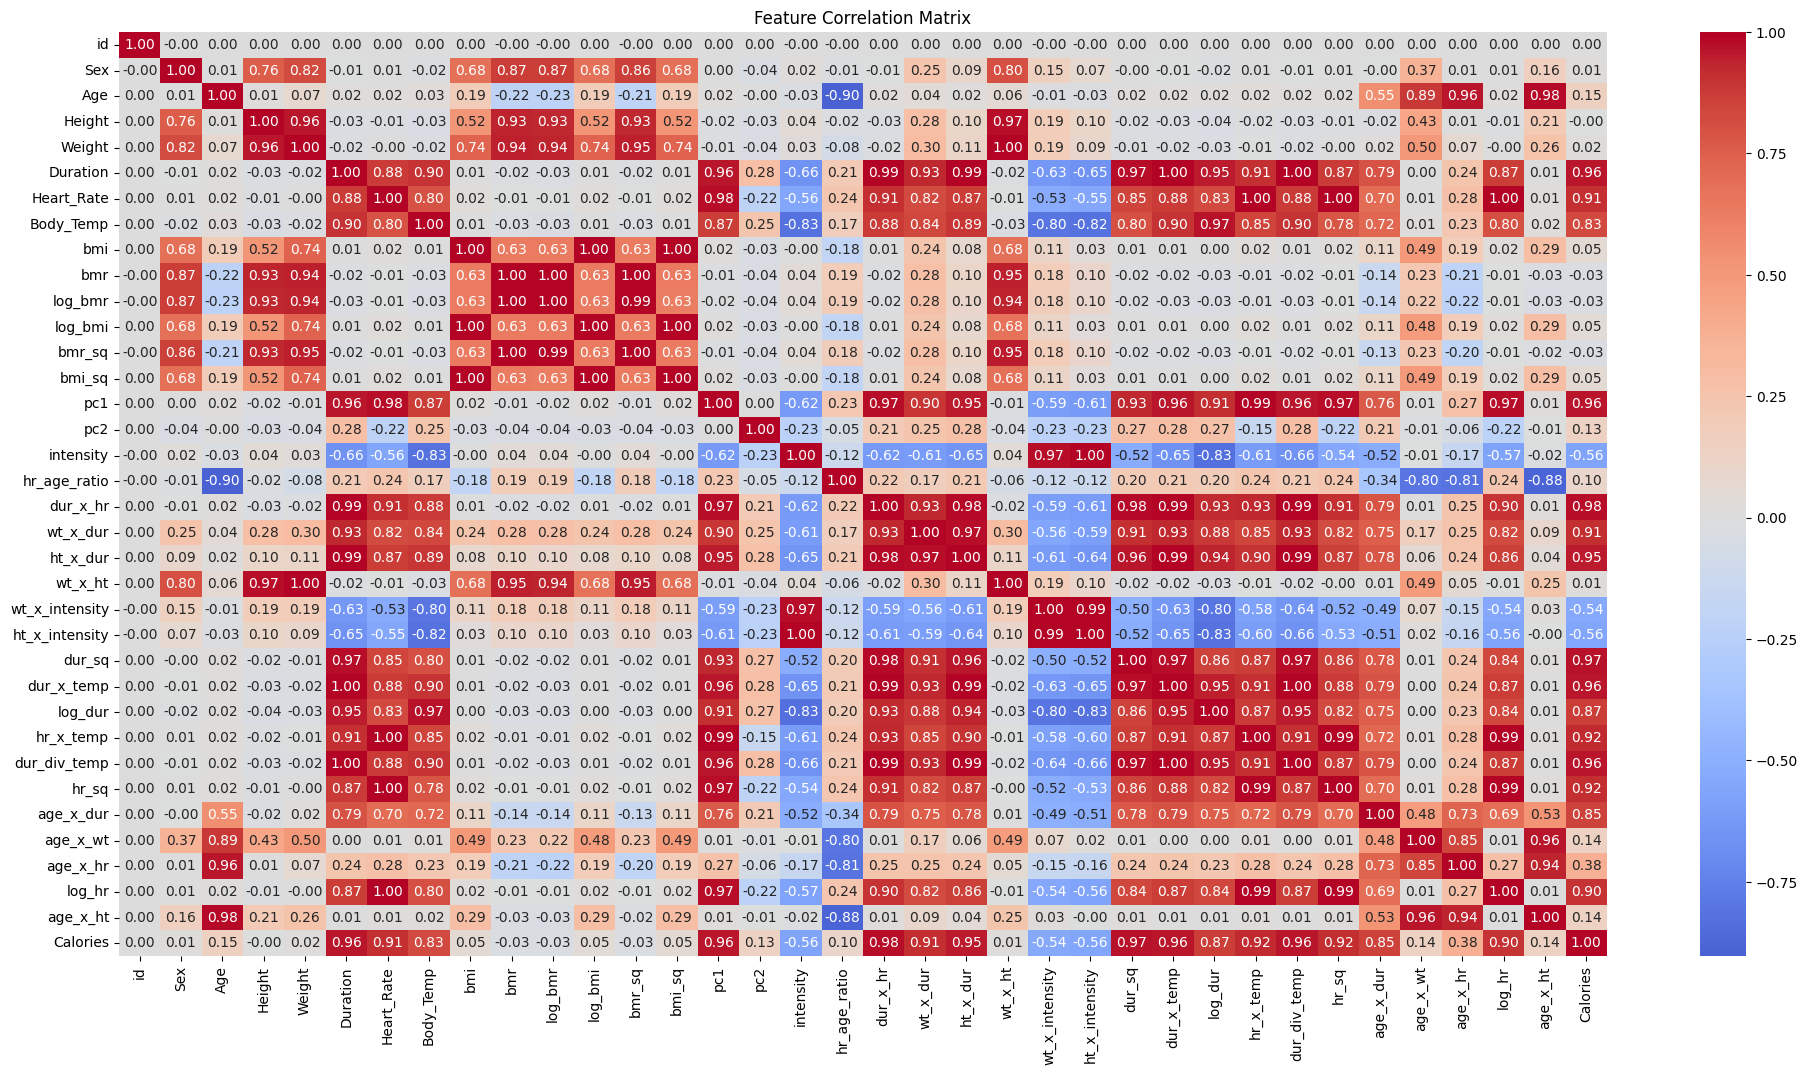

In [5]:
# Plot heatmap again with new features
cols = [col for col in df.columns if col != 'Calories'] + ['Calories']
df = df[cols]

plt.figure(figsize=(24,12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

## Modelling

In [6]:
x = df.drop(["Calories", "id"], axis=1)
y = df["Calories"]
X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.2, random_state=69)

### XGBoost

In [7]:
import xgboost as xgb
model = xgb.XGBRegressor(learning_rate=0.1, max_depth=12, n_estimators=600, random_state=42)

In [8]:
#Estimated Performance Metrics
model.fit(X_train, Y_train)

y_pred_val = model.predict(X_val)
y_pred_val = np.maximum(0, y_pred_val)

rmsle = np.sqrt(mean_squared_log_error(Y_val, y_pred_val))
print(f"RMSLE (validation): {rmsle:.4f}")

RMSLE (validation): 0.0614


In [ ]:
# Retrain on full data for better performance
model.fit(x, y)

test = df2.drop("id", axis=1)
y_pred_test = model.predict(test)
y_pred_test = np.maximum(0, y_pred_test)

#Save predictions
#pd.DataFrame({"id": df2["id"], "Calories": y_pred_test}).to_csv("predxg.csv", index=False)

### LightGBM

In [9]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=10)

In [10]:
#Estimated Performance Metrics
model.fit(X_train, Y_train)

y_pred_val = model.predict(X_val)
y_pred_val = np.maximum(0, y_pred_val)

rmsle = np.sqrt(mean_squared_log_error(Y_val, y_pred_val))
print(f"RMSLE (validation): {rmsle:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6374
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 34
[LightGBM] [Info] Start training from score 88.233215
RMSLE (validation): 0.0673


In [ ]:
# Retrain on full data for better performance
model.fit(x, y)

y_pred_test = model.predict(df2)
y_pred_test = np.maximum(0, y_pred_test)

#Save predictions
#pd.DataFrame({"id": df2["id"], "Calories": y_pred_test}).to_csv("predlgbm.csv", index=False)